# Problème d'ordonnancement

Le problème du montage d'un film s'apparente à un problème d'ordonnancement que nous tenterons de généraliser en premier temps.

Le problème est le suivant : nous souhaitons trouver l'ordre optimal dans lequel effectuer des activités (appelées *__tâches__*). Cependant, ces activités nécessitent des *__prérequis__* c'est-à-dire que pour effectuer une activité, il est nécessaire d'en avoir effectuer une (ou plusieurs) autre(s) au préalable. Enfin, chaque activité nécessite une certaine *__durée__* (en nombre de jours) pour être effectuée mais également un temps *__d'attente__* entre la fin d'un prérequis et le début de cette tâche. Ces durées doivent être minimisées de sorte à ce que les activités soient réalisées le plus tôt possible.

Ce problème peut être modélisé via un graphe avec chaque sommet représentant une tâche (assimilée à sa durée correspondante) et chaque arrête représentant un prérequis.


Le dossier est composé :
- d'une librairie visualisation (qui modèlise le problème)
- d'une librairie résolution (qui résout le problème)
- des tests des librairies
- d'un fichier toml pour la gestion des dépendances
- d'une interface en ligne de commande
- d'un fichier README de présentation
- d'une image png qui visualise le graphe associé au problème

# Sujet 5 - Montage d'un film

Nous devons proposer un planning optimal au producteur d'un film. Les contraintes sont les suivantes :


| Tâche | Nature | Durée (Jours) | Prérequis (au plut tôt) |
| --- | --- | --- | --- |
| A | Ecriture du scénario | 30 | - |
| B | Casting | 12 | fin A + 15j |
|C|Choix du lieu de tournage|8|fin A + 20j|
|D|Découpage technique|4|A et C finies|
|E|Décors|7|C et D finies|
|F|Tournages extérieurs|10|A,B,C et D finies|
|G|Tournages intérieurs|12|D,E et F finies|
|H|Synchronisation|3|F et G finies|
|I|Montage|14|H finie|
|J|Son|7|début I + 3j et fin H|
|K|Mixage|6|I et J finies|
|L|Tirage|1|fin K + 2j|

Ce qui s'apparente à un problème d'ordonnancement comme vu lors de la séance 13.


## Modélisation sous forme de dictionnaires

In [1]:
#données avec prérequis
donnees = {
        "A": [], 
        "B": ["A"],
        "C": ["A"],
        "D": ["A", "C"],
        "E": ["C","D"],
        "F": ["A","B","C","D"],
        "G": ["D", "E", "F"],
        "H": ["F", "G"],
        "I": ["H"],
        "J": ["H"],
        "K": ["I","J"],
        "L": ["K"],
    }

In [2]:
#donnees avec tâches, prérequis, attente et durée
donnees2 = {
        "A":([],30,0),
        "B":(["A"],12,15),
        "C":(["A"],8,20),
        "D":(["A", "C"],4,0),
        "E":(["C", "D"],7,0),
        "F":(["A", "B","C", "D"],10,0),
        "G":(["D", "E", "F"],12,0),
        "H":(["F", "G"],3,0),
        "I":(["H"],14,0),
        "J":(["H"],7,3),
        "K":(["I","J"],6,0),
        "L":(["K"],1,2)}

## Visualisation du problème

In [3]:
import lib_ordonnancement

Ce problème peut être visualisé sous forme d'un graphe. Chaque sommet rose représente une activité et les arrêtes (flêches rouges) représentent les prérequis.

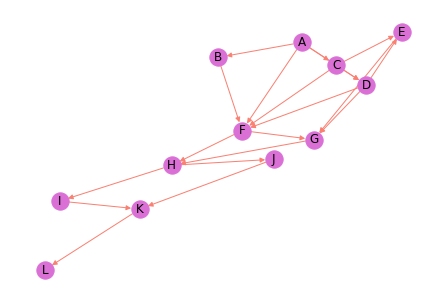

In [16]:
lib_ordonnancement.genere_graphe(donnees)

Le problème peut également être visualisé sous forme de tableau en ajoutant cette fois la durée et l'attente :

In [6]:
lib_ordonnancement.cdc_to_table(donnees2)

┏━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓
┃ Tâche ┃ Prérequis ┃ Durée ┃ Attente ┃
┡━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩
│ A     │           │ 30    │ 0       │
│ B     │ A         │ 12    │ 15      │
│ C     │ A         │ 8     │ 20      │
│ D     │ A C       │ 4     │ 0       │
│ E     │ C D       │ 7     │ 0       │
│ F     │ A B C D   │ 10    │ 0       │
│ G     │ D E F     │ 12    │ 0       │
│ H     │ F G       │ 3     │ 0       │
│ I     │ H         │ 14    │ 0       │
│ J     │ H         │ 7     │ 3       │
│ K     │ I J       │ 6     │ 0       │
│ L     │ K         │ 1     │ 2       │
└───────┴───────────┴───────┴─────────┘

En respectant les prérequis, toutes les possibilités d'ordonnancement sont les suivantes :

In [4]:
for ordre in lib_ordonnancement.genere_ordres(donnees):
    print(ordre)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'I', 'K', 'L']
['A', 'B', 'C', 'D', 'F', 'E', 'G', 'H', 'I', 'J', 'K', 'L']
['A', 'B', 'C', 'D', 'F', 'E', 'G', 'H', 'J', 'I', 'K', 'L']
['A', 'C', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['A', 'C', 'B', 'D', 'E', 'F', 'G', 'H', 'J', 'I', 'K', 'L']
['A', 'C', 'B', 'D', 'F', 'E', 'G', 'H', 'I', 'J', 'K', 'L']
['A', 'C', 'B', 'D', 'F', 'E', 'G', 'H', 'J', 'I', 'K', 'L']
['A', 'C', 'D', 'B', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['A', 'C', 'D', 'B', 'E', 'F', 'G', 'H', 'J', 'I', 'K', 'L']
['A', 'C', 'D', 'B', 'F', 'E', 'G', 'H', 'I', 'J', 'K', 'L']
['A', 'C', 'D', 'B', 'F', 'E', 'G', 'H', 'J', 'I', 'K', 'L']
['A', 'C', 'D', 'E', 'B', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['A', 'C', 'D', 'E', 'B', 'F', 'G', 'H', 'J', 'I', 'K', 'L']


## Résolution du problème

Nous commencons par rechercher le ou les activité(s) qui ne nécessite(nt) pas de prérequis grâce à la fonction `_cherche_sans_prerequis` :

In [4]:
lib_ordonnancement._cherche_sans_prerequis(donnees)

['A']

Seul l'activité A ne détient pas de prérequis nécessaire. Le montage du film débutera donc par l'activité A : écriture du scénario.

L'ordre optimal dans lesquels effectuer les tâches est le suivant :

In [6]:
lib_ordonnancement.ordonnance(donnees)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

Nous stockons la solution du problème dans un objet `solution` trouvée grâce à la fonction `edt_parallele` :

In [10]:
solution=lib_ordonnancement.edt_parallele(donnees2)

Puis nous visualisons la solution du problème sous forme d'un tableau récapitulatif avec les jours de début et de fin grâce à la fonction `edt_to_table` :

In [11]:
lib_ordonnancement.edt_to_table(solution)

┏━━━━━━━┳━━━━━━━┳━━━━━┓
┃ Tâche ┃ Debut ┃ Fin ┃
┡━━━━━━━╇━━━━━━━╇━━━━━┩
│ A     │ 0     │ 30  │
│ B     │ 45    │ 57  │
│ C     │ 50    │ 58  │
│ D     │ 58    │ 62  │
│ E     │ 62    │ 69  │
│ F     │ 62    │ 72  │
│ G     │ 72    │ 84  │
│ H     │ 84    │ 87  │
│ I     │ 87    │ 101 │
│ J     │ 90    │ 97  │
│ K     │ 101   │ 107 │
│ L     │ 109   │ 110 │
└───────┴───────┴─────┘

Le montage du film se fera donc en 110 jours minimum. 